# Given

2 example datasets showcasing different reasons of Underfitting and Overfitting. Using SKLearn implementations

# Find 

find out  Train and CV accuracy dynamics and proove below helps:

High Bias (aka underfitting):

* use polynomial features
* add more features
* decrease regularization parameter

High Variance (aka overfitting):
* increase regularization parameter
* reduce features
* get more training examples

# *Disclaimer

on Neural Network High Bias / High Variance problem should be treated differently:

### Schematic Diagram: Model Evaluation and Improvement Process

The process for evaluating and improving a model can be summarized as follows:

* Does model perform well on a training set ?
    * No -> increase the size of NN
    * Yes -> next step
* Does the model perform well on a validation set?
    * No -> add more data and repeat whole process
    * Yes -> finish

Golden rule is: larger nn networks never hurts, just use kernel_regularizer parameter $\lambda$=0.01


# Solution

### Performance Baseline

To assess baseline you should:
1) try evaluate yourself - human level
2) look at competing algorithms
3) guestimate

In [268]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

import tensorflow as tf

### Treat Underfitting (High Bias)

##### Polynomial features

Test stand

Mean of feature x = 2500.0000000000005


Text(0.5, 1.0, 'Test stand')

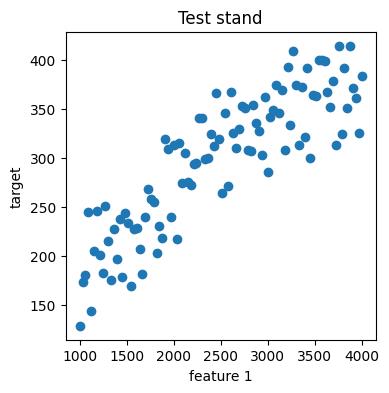

In [269]:
data = np.loadtxt("./Lab8_data1.csv", delimiter=",")
x = data[:,0]
y = data[:,-1]

print(f"Mean of feature x = {np.mean(x)}")

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x, y)
ax.set_xlabel("feature 1")
ax.set_ylabel("target")
ax.set_title("Test stand")

In [270]:
def split_scale_polyonm(x, y, max_dim=10):

    # Split dataset

    x_train, x_valtest, y_train, y_valtest = train_test_split(x, y, train_size=0.6, random_state=36)
    x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, train_size=0.5, random_state=36)

    # scale features

    scaler = StandardScaler()

    if x_train.ndim == 1:
        x_train_scaled = scaler.fit_transform(x_train.reshape(-1,1))
        x_val_scaled = scaler.fit_transform(x_val.reshape(-1,1))
    else:
        x_train_scaled = scaler.fit_transform(x_train)
        x_val_scaled = scaler.fit_transform(x_val)       


    # increase polynom

    accuracy_log = []
    weights_biases_log = []

    for dim in range(1, max_dim):

        polynom = PolynomialFeatures(dim, include_bias=False)
        x_train_scaled_poly = polynom.fit_transform(x_train_scaled)
        x_val_scaled_poly = polynom.transform(x_val_scaled)
        
        model = LinearRegression()
        model.fit(x_train_scaled_poly, y_train)
        
        #print(f"model.coef_ = {[model.coef_].shape}, intercept = {model.intercept_.shape}")

        weights_biases = [[model.coef_],[model.intercept_]]
        weights_biases_log.append([dim, weights_biases])

        prediction = model.predict(x_train_scaled_poly)
        train_accuracy = mean_squared_error(y_train, prediction) / 2

        prediction = model.predict(x_val_scaled_poly)
        val_accuracy = mean_squared_error(y_val, prediction) / 2    

        accuracy_log.append([dim, train_accuracy, val_accuracy])

    accuracy_log = np.array(accuracy_log)

    return accuracy_log, weights_biases_log, x_train_scaled, y_train, x_val_scaled, y_val

In [271]:
accuracy_log, weights_biases_log, x_train_scaled, y_train, x_val_scaled, y_val = split_scale_polyonm(x, y)

Plot results

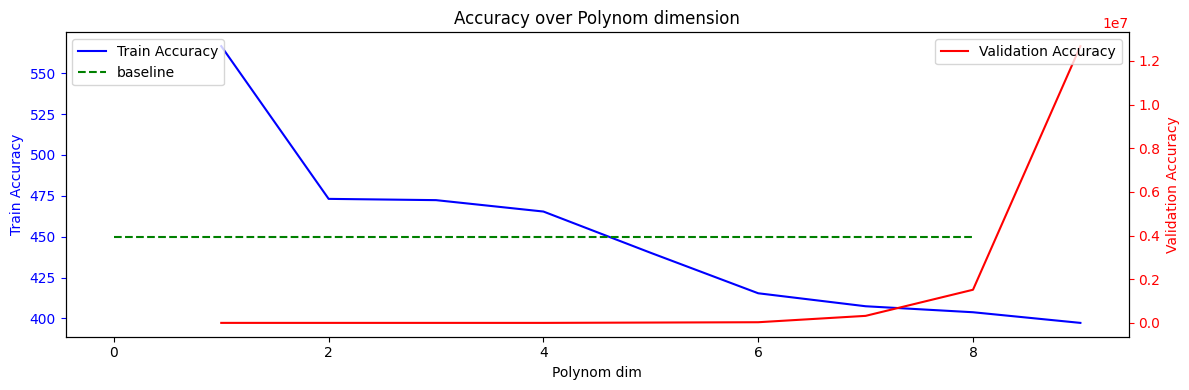

In [272]:
fig, ax1 = plt.subplots(figsize=(12,4))

# Plotting the first series on the left y-axis
ax1.plot(accuracy_log[:,0], accuracy_log[:,1], c='b', label="Train Accuracy")
ax1.plot(np.repeat(450, len(accuracy_log[:,0])), c='g', linestyle='--', label='baseline')
ax1.set_xlabel('Polynom dim')
ax1.set_ylabel('Train Accuracy', color='b')
ax1.tick_params('y', colors='b')

# Creating a second y-axis on the right
ax2 = ax1.twinx()

# Plotting the second series on the right y-axis
ax2.plot(accuracy_log[:,0], accuracy_log[:,2], c='r', label="Validation Accuracy")
ax2.set_ylabel('Validation Accuracy', color='r')
ax2.tick_params('y', colors='r')

ax1.set_title('Accuracy over Polynom dimension')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()

Observations
* Increasing polynom helps to reduce High Bias (underfit) problem
* increasing polynom too much introduces Overfitting

Plot

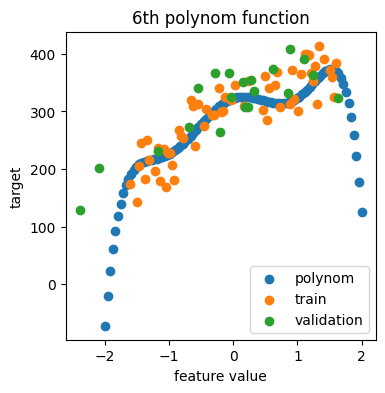

In [273]:
ox = np.linspace(-2,2,num=100)
oy = 36.15310794*ox -119.8780335*ox**2 +15.77098757*ox**3 +92.07947386*ox**4 -3.12979435*ox**5 -20.15900922*ox**6 + 322.5835977


fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(ox, oy, label="polynom")
ax.scatter(x_train_scaled, y_train, label="train")
ax.scatter(x_val_scaled, y_val, label="validation")
ax.set_xlabel("feature value")
ax.set_ylabel("target")
ax.set_title("6th polynom function")
ax.legend()

Conclusion
* Model underfits on up to 5th degree polynom,
* Increasing dimension helps reduce overfitting

##### Adding more features

Test stand

(100, 2) (100,)


Text(0.5, 1.0, 'Test stand')

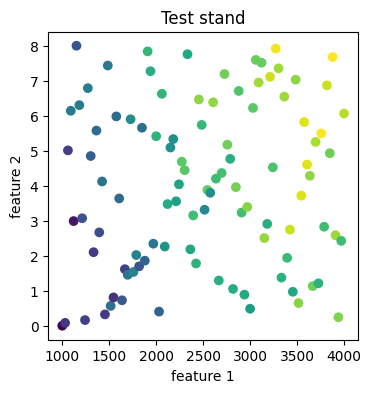

In [274]:
data = np.loadtxt("./Lab8_data1.csv", delimiter=",")
x = data[:,:-1]
y = data[:,-1]

print(x.shape, y.shape)

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x[:,0], x[:,1], c=y)
ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2")
ax.set_title("Test stand")

In [275]:
accuracy_log, weights_biases_log, x_train_scaled, y_train, x_val_scaled, y_val = split_scale_polyonm(x, y)

Plot

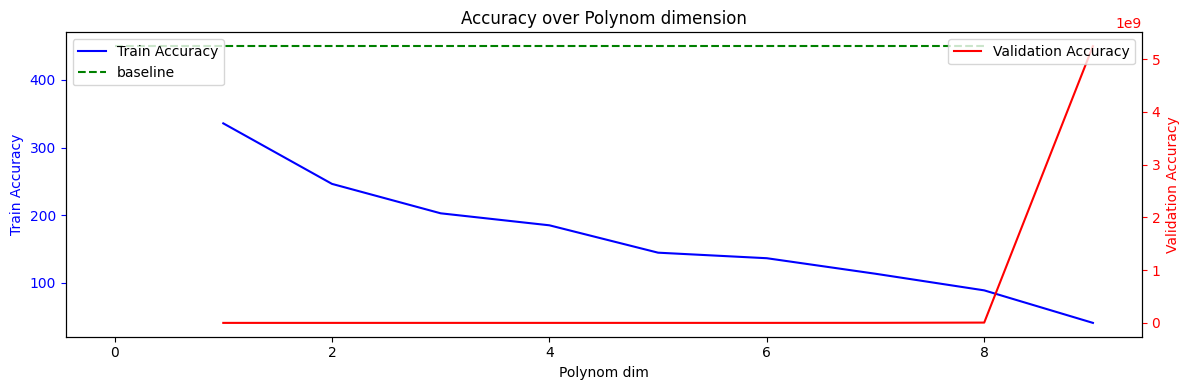

In [276]:
fig, ax1 = plt.subplots(figsize=(12,4))

# Plotting the first series on the left y-axis
ax1.plot(accuracy_log[:,0], accuracy_log[:,1], c='b', label="Train Accuracy")
ax1.plot(np.repeat(450, len(accuracy_log[:,0])), c='g', linestyle='--', label='baseline')
ax1.set_xlabel('Polynom dim')
ax1.set_ylabel('Train Accuracy', color='b')
ax1.tick_params('y', colors='b')

# Creating a second y-axis on the right
ax2 = ax1.twinx()

# Plotting the second series on the right y-axis
ax2.plot(accuracy_log[:,0], accuracy_log[:,2], c='r', label="Validation Accuracy")
ax2.set_ylabel('Validation Accuracy', color='r')
ax2.tick_params('y', colors='r')

ax1.set_title('Accuracy over Polynom dimension')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()

Observations:
* Comparing to previous example, the errors are much less with new features

Plot

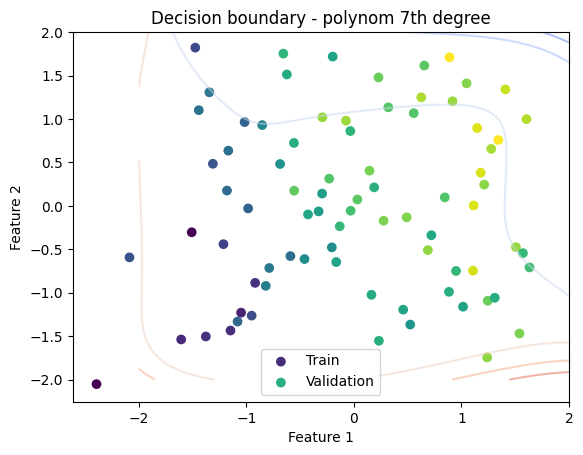

In [278]:
_x1 = np.linspace(-2,2,num=200)
_x2 = np.linspace(-2,2,num=200)
ox1, ox2 = np.meshgrid(_x1, _x2)

oy = 103.01254266*ox1 + 56.28327144*ox2 - 101.08520507*ox1**2 - 25.62923297*ox2**2 + \
    56.73717906*ox1**3 - 87.52029496*ox2**3 - 75.16047915*ox1**4 - 106.12593748*ox2**4 - \
        74.98679582*ox1**5 + 48.4618573*ox2**5 + 180.34783283*ox1**6 + 46.71863158*ox2**6 - \
            111.38582401*ox1**7 - 191.66245591*ox2**7 + 72.55362044 + -39.36520589*ox1*ox2 + \
                129.44602604*ox1**2*ox2 + 230.61424542*ox1*ox2**2 + 28.7920653*ox1**2*ox2**2 - \
                    0.76179508*ox1**3*ox2 + 29.06051757*ox1*ox2**3 - 109.70278487*ox1**2*ox2**3 - \
                        158.1636411*ox1**3*ox2**3 - 86.17688031*ox1**4*ox2 + 102.15284913*ox1*ox2**4 + \
                            148.58620234*ox1**2*ox2**4 + 127.49656438*ox1**3*ox2**4 - 23.79556698*ox1**4*ox2**4 + \
                                32.52227282*ox1**5*ox2 - 15.54191963*ox1**6*ox2 - 97.38501542*ox1*ox2**5 - \
                                    99.79373166*ox1**2*ox2**5 + 22.39946162*ox1**3*ox2**5 + 20.25370615*ox1**4*ox2**5 - \
                                        14.64161196*ox1**5*ox2**5 + 4.34403058*ox1**6*ox2 + 26.53676246*ox1*ox2**6 + \
                                            42.29362568*ox1**2*ox2**6 + 11.69867022*ox1**3*ox2**6 + 6.03774398*ox1**4*ox2**6 - \
                                                17.22845778*ox1**5*ox2**6 - 47.82820608*ox1*ox2**7 - 31.60097442*ox1**2*ox2**7 + 340.12582796

plt.contour(ox1, ox2, oy, alpha=0.5, cmap='coolwarm')
plt.scatter(x_train_scaled[:,0], x_train_scaled[:,1], c=y_train, label='Train')
plt.scatter(x_val_scaled[:,0], x_val_scaled[:,1], c=y_val, label='Validation')
plt.title("Decision boundary - polynom 7th degree")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

##### Reduce regularization parameter

In [279]:
lambdas_to_try = [10,5,2,1,0.5,0.2,0.1,0.01,0.001]

accuracy_log = []


polynom = PolynomialFeatures(4, include_bias=False)
x_train_scaled_poly = polynom.fit_transform(x_train_scaled)
x_val_scaled_poly = polynom.transform(x_val_scaled)

for _lambda in lambdas_to_try:

    # define model

    model = Ridge(alpha=_lambda) # equivalent of LinearRegression with punishment to squared weights
    model.fit(x_train_scaled_poly, y_train)
        
    prediction = model.predict(x_train_scaled_poly)
    accuracy_train = mean_squared_error(y_train, prediction) / 2
    
    prediction = model.predict(x_val_scaled_poly)
    accuracy_val = mean_squared_error(y_val, prediction) / 2

    accuracy_log.append([_lambda, accuracy_train, accuracy_val])

accuracy_log = np.array(accuracy_log)

Plot

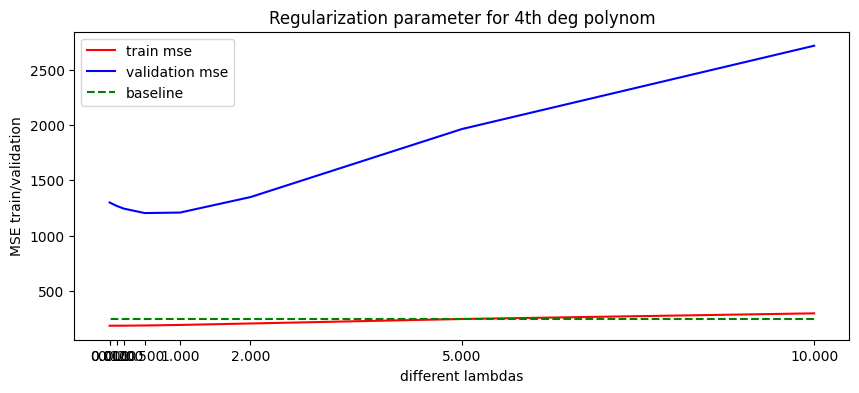

In [280]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(lambdas_to_try, accuracy_log[:,1], c='r', label='train mse')
ax.plot(lambdas_to_try, accuracy_log[:,2], c='b', label='validation mse')
ax.plot(lambdas_to_try, np.repeat(250,len(lambdas_to_try)), linestyle='--', label='baseline', c='g')
ax.set_xticks(lambdas_to_try)
ax.set_xlabel("different lambdas")
ax.set_ylabel("MSE train/validation")
plt.title("Regularization parameter for 4th deg polynom")
plt.legend()

Observations:
* there is a balance for $\lambda$
* too small contributes to overfit (high variance)
* too large introduces underfitting (high bias)

### Treat Underfitting (High Bias)

##### Increase the regularization parameter

Opposite to the chart above, whem $\lambda$ is too small the model Overfits. Increase lambda to reduce validation error.

##### Try smaller sets of features

Test stand

In [281]:
data = np.loadtxt("./Lab8_data1.csv", delimiter=",")

random_feature =np.random.uniform(size=x.shape[0]) # add a random feature
x = data[:,:-1]
x_random = np.c_[data[:,:-1], random_feature]

y = data[:,-1].reshape(-1,1)

x.shape, y.shape

((100, 2), (100, 1))

In [282]:
accuracy_log_random, _, _, _, _, _ = split_scale_polyonm(x_random, y, max_dim=5)

accuracy_log, _, _, _, _, _ = split_scale_polyonm(x, y, max_dim=5)

accuracy_log_random, accuracy_log

(array([[1.00000000e+00, 3.34081254e+02, 6.64810448e+02],
        [2.00000000e+00, 2.40342156e+02, 9.66963485e+02],
        [3.00000000e+00, 1.65443748e+02, 1.52283879e+03],
        [4.00000000e+00, 1.10499263e+02, 2.48707551e+03]]),
 array([[1.00000000e+00, 3.35832171e+02, 6.53758683e+02],
        [2.00000000e+00, 2.46286687e+02, 9.00704737e+02],
        [3.00000000e+00, 2.02762837e+02, 1.01357711e+03],
        [4.00000000e+00, 1.85019485e+02, 1.29982174e+03]]))

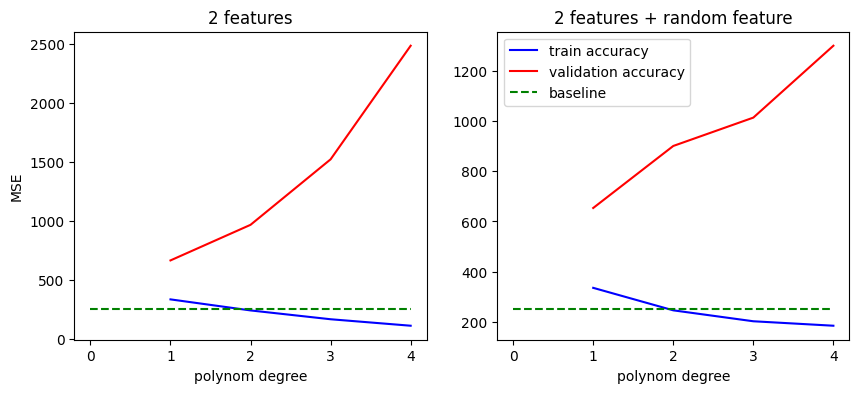

In [283]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].plot(accuracy_log_random[:,0], accuracy_log_random[:,1], c='b', label='train accuracy')
ax[0].plot(accuracy_log_random[:,0], accuracy_log_random[:,2], c='r', label='validation accuracy')

ax[1].plot(accuracy_log[:,0], accuracy_log[:,1], c='b', label='train accuracy')
ax[1].plot(accuracy_log[:,0], accuracy_log[:,2], c='r', label='validation accuracy')

ax[0].plot(np.repeat(250, accuracy_log.shape[0]+1), c='g', linestyle='--', label='baseline')
ax[1].plot(np.repeat(250, accuracy_log.shape[0]+1), c='g', linestyle='--', label='baseline')

ax[0].set_title("2 features")
ax[1].set_title("2 features + random feature")

ax[0].set_xlabel("polynom degree")
ax[0].set_ylabel("MSE")
ax[1].set_xlabel("polynom degree")

plt.legend()

<b>Conclusion:</b>

* 3 features is faster to overfit
* 2 features +1 random validation error is higher than 2 features
* gap between train and validation error is a lot wider

##### Get more training samples

Test stand

In [284]:
data = np.loadtxt("./Lab8_data2.csv", delimiter=",")

Increase size of a training set

In [308]:
sample_sizes = np.arange(0.1,1,0.1)

accuracy_log = []

for sample_size in sample_sizes:
    limit = int(sample_size*data.shape[0])

    sample = data[:limit]
    
    x = sample[:,:-1]
    y = sample[:,-1].reshape(-1,1)


    # split train test val
    x_train, x_testval, y_train, y_testval = train_test_split(x, y, train_size=0.4, random_state = 42)
    x_test, x_val, y_test, y_val = train_test_split(x_testval, y_testval, train_size=0.5, random_state = 42)

    # scale features
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_val_scaled = scaler.fit_transform(x_val)

    # polynom
    poly = PolynomialFeatures(degree=4, include_bias=False)
    x_train_scaled_poly = poly.fit_transform(x_train_scaled)
    x_val_scaled_poly = poly.transform(x_val_scaled)

    # model
    model = LinearRegression()
    model.fit(x_train_scaled_poly, y_train)
    
    # accuracy

    prediction = model.predict(x_train_scaled_poly)
    accuracy_train = mean_squared_error(y_train, prediction) / 2

    prediction = model.predict(x_val_scaled_poly)
    accuracy_val = mean_squared_error(y_val, prediction) / 2

    accuracy_log.append([limit, accuracy_train, accuracy_val])

accuracy_log = np.array(accuracy_log)

Plot

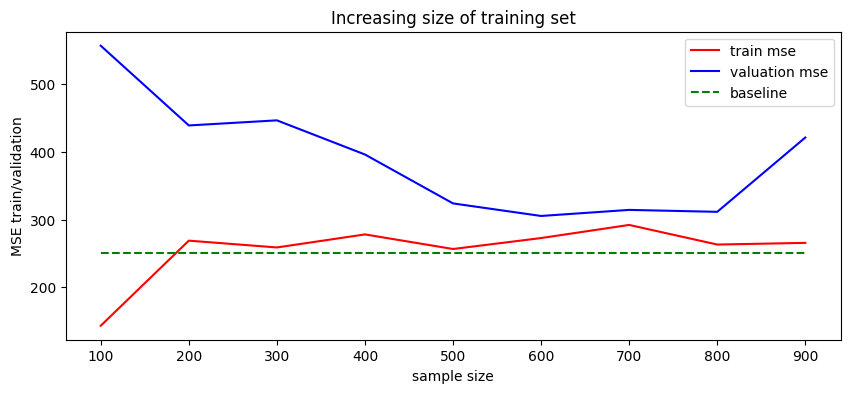

In [310]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(accuracy_log[:,0], accuracy_log[:,1], c='r', label='train mse')
ax.plot(accuracy_log[:,0], accuracy_log[:,2], c='b', label='valuation mse')
ax.plot(accuracy_log[:,0], np.repeat(250, len(sample_sizes)), c='g', linestyle='--', label='baseline')
ax.set_xlabel("sample size")
ax.set_ylabel("error")
ax.set_title("Increasing size of training set")
plt.legend()


Observations
* Increase in sample reduces valuation error, hence helps High Variance
* It doesn't help High Bias because train error remain relatively same